# 미국의 기준금리가 원/달러 환율 및 한국의 수출입에 미치는 영향

In [71]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import platform

## 미국의 기준금리와 한국의 기준금리

In [72]:
# 파일불러오기
rate_A=pd.read_csv('./Data/미국금리_월.csv',encoding='euc_kr')
rate_K=pd.read_csv('./Data/한국금리_월.csv',encoding='euc_kr')

# 열 이름 수정
rate_A.rename(columns={'날짜':'기간','실제':'미국금리'}, inplace=True)
rate_K.rename(columns={'실제':'한국금리'}, inplace=True)

# 합치기
rate=pd.concat([rate_A,rate_K],axis=1)

# 필요없는 행/열 제거
rate.drop(rate.index[-1],inplace=True)
rate=rate[rate.columns[[0,1,4]]]

# 금리 %제거 후 숫자로 변경
rate['미국금리']=rate['미국금리'].apply(lambda x:x[:-1])
rate['미국금리']=rate['미국금리'].apply(lambda x:float(x))

rate['한국금리']=rate['한국금리'].apply(lambda x:x[:-1])
rate['한국금리']=rate['한국금리'].apply(lambda x:float(x))

rate

,기간,미국금리,한국금리
0,2019-01,2.50,1.75
1,2019-02,2.50,1.75
2,2019-03,2.50,1.75
3,2019-04,2.50,1.75
4,2019-05,2.50,1.75
5,2019-06,2.50,1.75
6,2019-07,2.50,1.75
7,2019-08,2.25,1.50
8,2019-09,2.25,1.50
9,2019-10,2.00,1.50


## 한국의 총 수출입, 대 미국 수출입

In [73]:
# 파일 불러오기
df=pd.read_excel('./Data/수출입총괄_202207200.xls',skiprows=4)
df_A=pd.read_excel('./Data/국가별 수출입 실적_202207201.xls',skiprows=4)

# 열 이름 수정
df_A.rename(columns={'수출금액':'대미국수출금액','수입금액':'대미국수입금액'},inplace=True)

# 합치기
df=pd.concat([df,df_A],axis=1)

# 중복제거
df=df.T.drop_duplicates().T

# 필요없는 열/행 제거
df=df.drop(0).reset_index(drop=True)
df2=df[df.columns[[0,2,4,8,10]]]

# 데이터 콤마 제거후 숫자로 변경 
for col in df2.columns[1:]:
    for i in range(df.shape[0]):
        df2[col][i]=df2[col][i].replace(',','')
    df2[col] = pd.to_numeric(df2[col])

# 기간컬럼 형태 변경
for i in range(df2.shape[0]):
    df2['기간'][i]=df2['기간'][i].replace('.','-')

df2



C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\User\AppData\Local\Temp\ipykernel_10736\1475988180.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][i]=df2[col][i].replace(',','')
C:\Users\User\AppData\Local\Temp\ipykernel_10736\1475988180.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,기간,수출금액,수입금액,대미국수출금액,대미국수입금액
0,2019-01,46168934,45153389,6209466,5290688
1,2019-02,39481803,36651437,5442457,4371194
2,2019-03,47003206,41992349,6319152,5022184
3,2019-04,48781156,45047164,6158443,5585755
4,2019-05,45703948,43619667,6500301,5512696
5,2019-06,44008404,40104812,6249176,4671519
6,2019-07,46078221,43762245,6113230,5383261
7,2019-08,44020065,42457250,5619803,5175083
8,2019-09,44629053,38741473,5690676,4758785
9,2019-10,46648756,41396517,6357758,4963127


## 환율

In [74]:
# 파일 불러오기
ratio=pd.read_csv('./Data/주요국 통화의 대원화환율_19143334.csv')

# 열이름 변경
ratio.rename(columns={'변환':'날짜','원자료':'환율'},inplace=True)

# 데이터 콤마 제거후 숫자로 변경
for i in range(ratio.shape[0]):
    ratio['환율'][i]=ratio['환율'][i].replace(',','')
ratio['환율']=pd.to_numeric(ratio['환율'])

# '날짜'컬럼에서 연/월 추출후 DF에 추가
Y_list=[]
M_list=[]
for i in range(ratio.shape[0]):
    Y_list.append(ratio['날짜'][i].split('/')[0])
    M_list.append(ratio['날짜'][i].split('/')[1])

ratio['Y']=Y_list
ratio['M']=M_list

# 연/월을 기준으로 그룹화
ratio_group=ratio.groupby(['Y','M'])

# 환율 월평균 소수점 2자리까지
ratio_M=round(ratio_group.mean(),2)

# 기간컬럼 형태변경 후 DF에 추가
ratio_date=[]
for i in range(ratio_M.shape[0]):
    ratio_date.append('-'.join(list(ratio_M.index[i])))
ratio_M.insert(0,'기간',ratio_date)
ratio_M.reset_index(drop=True,inplace=True)

ratio_M

,기간,환율
0,2019-01,1122.00
1,2019-02,1122.45
2,2019-03,1130.72
3,2019-04,1140.95
4,2019-05,1183.29
5,2019-06,1175.62
6,2019-07,1175.31
7,2019-08,1208.98
8,2019-09,1197.55
9,2019-10,1184.13


## DF 합치기

In [75]:
DF=pd.concat([rate,df2,ratio_M],axis=1)
DF=DF.T.drop_duplicates().T
DF

,기간,미국금리,한국금리,수출금액,수입금액,대미국수출금액,대미국수입금액,환율
0,2019-01,2.5,1.75,46168934,45153389,6209466,5290688,1122.0
1,2019-02,2.5,1.75,39481803,36651437,5442457,4371194,1122.45
2,2019-03,2.5,1.75,47003206,41992349,6319152,5022184,1130.72
3,2019-04,2.5,1.75,48781156,45047164,6158443,5585755,1140.95
4,2019-05,2.5,1.75,45703948,43619667,6500301,5512696,1183.29
5,2019-06,2.5,1.75,44008404,40104812,6249176,4671519,1175.62
6,2019-07,2.5,1.75,46078221,43762245,6113230,5383261,1175.31
7,2019-08,2.25,1.5,44020065,42457250,5619803,5175083,1208.98
8,2019-09,2.25,1.5,44629053,38741473,5690676,4758785,1197.55
9,2019-10,2.0,1.5,46648756,41396517,6357758,4963127,1184.13


## 그래프 그리기

In [76]:
# 한글 글꼴
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')

else:
    plt.rc('font', family = 'AppleGothic')

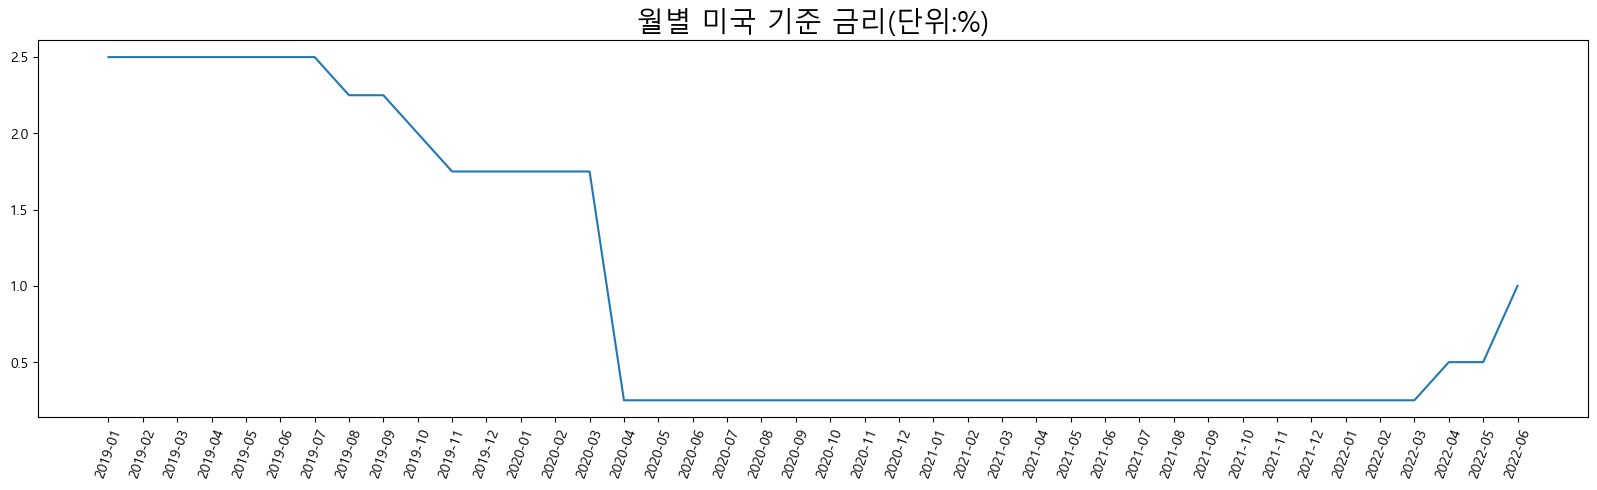

In [77]:
# 미국 기준 금리

plt.figure(dpi=100,figsize=(20,5))
plt.xticks(rotation=70)
plt.title("월별 미국 기준 금리(단위:%)",fontsize=20)

plt.plot(DF['기간'],DF['미국금리'])
plt.show()

### 월별 미국 기준 금리
 - 2019년 초 2.5%대를 유지하던 기준금리는 서서히 낮아지다가 코로나 확산 이후 0.25%대까지 떨어짐
 - 이후 러·우 전쟁, 이상기후 등으로 인한 물가 상승을 막기위해 다시 기준금리를 인상하고 있음
 - 최근에는 한번더 인상하여 1.75%에 도달하였고(2022년 6월 15일), 7월에도 0.75%p 인상될 것으로 전문가들은 예측 

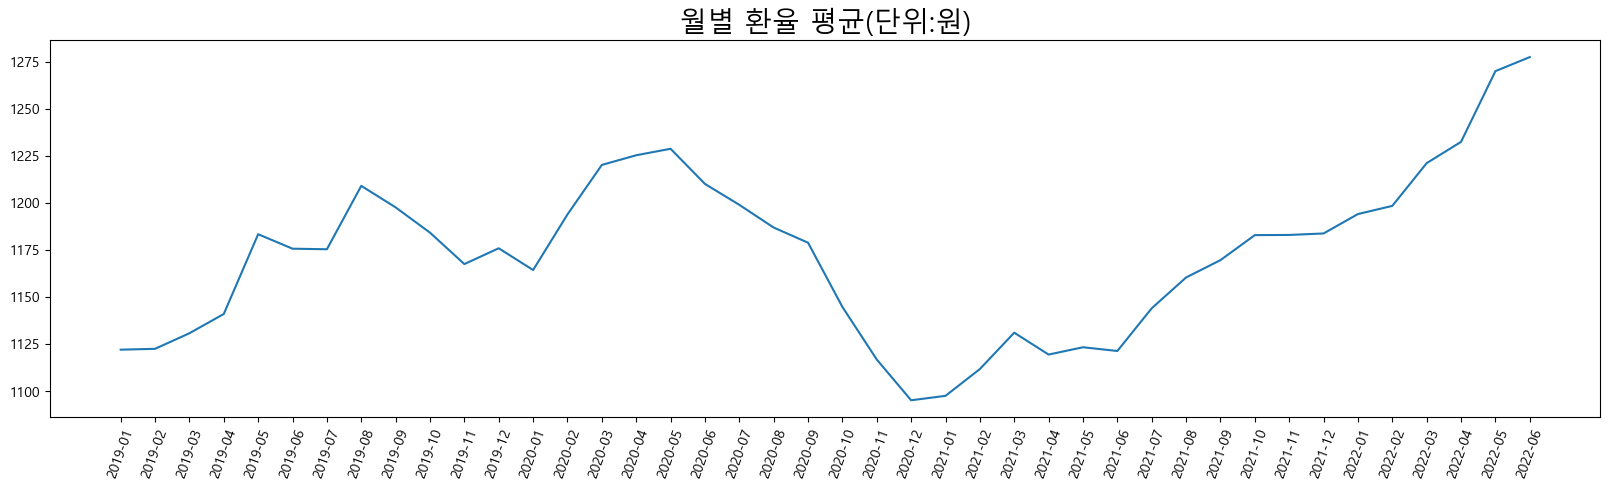

In [78]:
# 월별 환율
plt.figure(dpi=100,figsize=(20,5))
plt.title("월별 환율 평균(단위:원)",fontsize=20)
plt.plot(DF['기간'],DF['환율'])
plt.xticks(rotation=70)
plt.show()

### 월별 환율 평균
 - 코로나 확산 이후 달러화 강세
 - 코로나가 안정기로 접어든 이후 경기회복에 대한 기대로 원화 강세
 - 이후 경제의 불확실성이 커져 안전자산인 달러화의 선호가 다시 커짐 

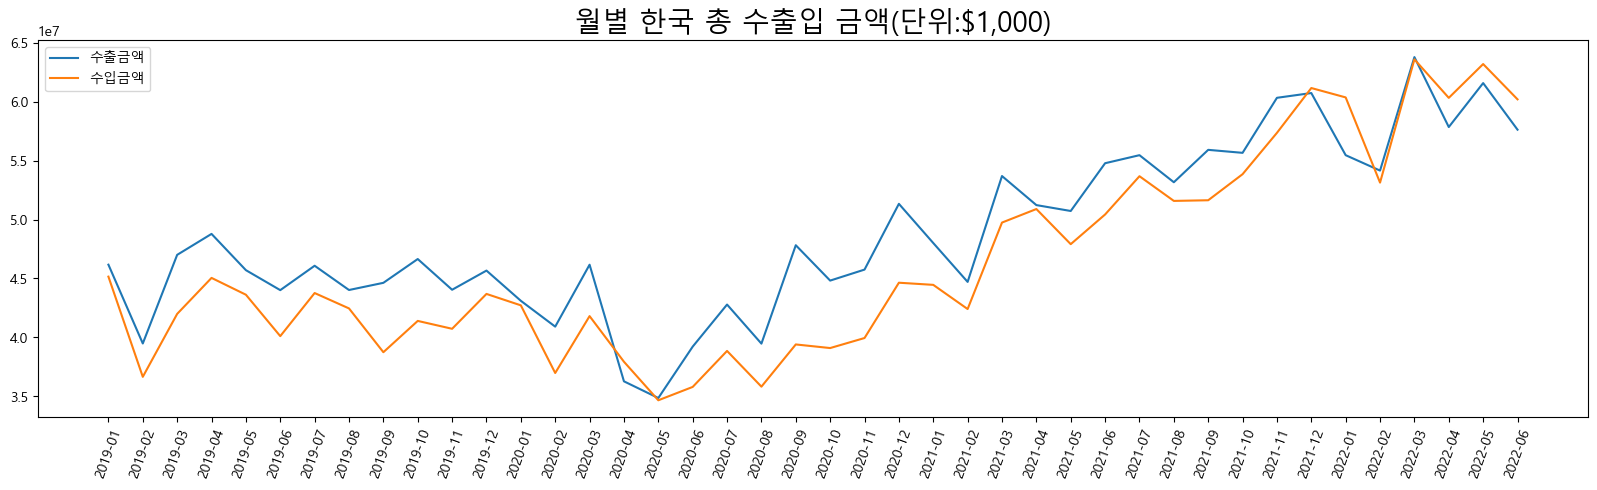

In [79]:
# 한국의 수출, 수입

plt.figure(dpi=100,figsize=(20,5))
plt.xticks(rotation=70)
plt.title("월별 한국 총 수출입 금액(단위:$1,000)",fontsize=20)

plt.plot(DF['기간'],DF['수출금액'])
plt.plot(DF['기간'],DF['수입금액'])

plt.legend(['수출금액','수입금액'])
plt.show()

### 한국의 수출, 수입
 - 코로나 충격으로 감소했었던 수출입 금액이 지속적으로 증가하는 추세에 있다가 최근 감소

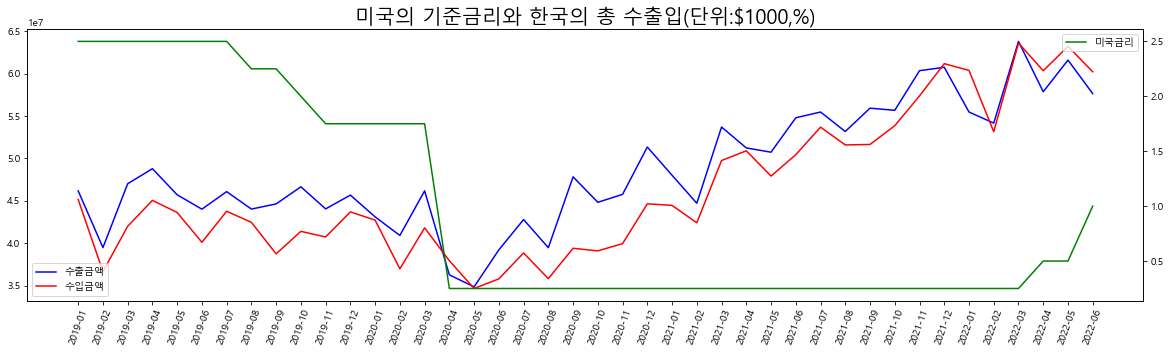

In [80]:
# 금리 & 총 수출수입
plt.rcParams['figure.figsize'] = (20, 5)


fig, ax1 = plt.subplots()
plt.xticks(rotation=70)
plt.title("미국의 기준금리와 한국의 총 수출입(단위:$1000,%)",fontsize=20)
ax1.plot(DF['기간'],DF['수출금액'],color='blue')
ax1.plot(DF['기간'],DF['수입금액'],color='red')
ax1.legend(['수출금액','수입금액'],loc='lower left')

ax2 = ax1.twinx()

ax2.plot(DF['기간'],DF['미국금리'],color='green')
ax2.legend(['미국금리'])

plt.show()

### 미국의 기준금리와 한국의 총 수출입
 - 미국의 기준금리가 낮으면 달러화가 약세가 되어 수출이 감소하고 수입이 증가할 것이라고 예측했지만 둘다 증가함

 - 개선점
   - 미국의 금리변화에 대한 한국금리의 변화를 반영
   - 대 미국 수출입만 반영

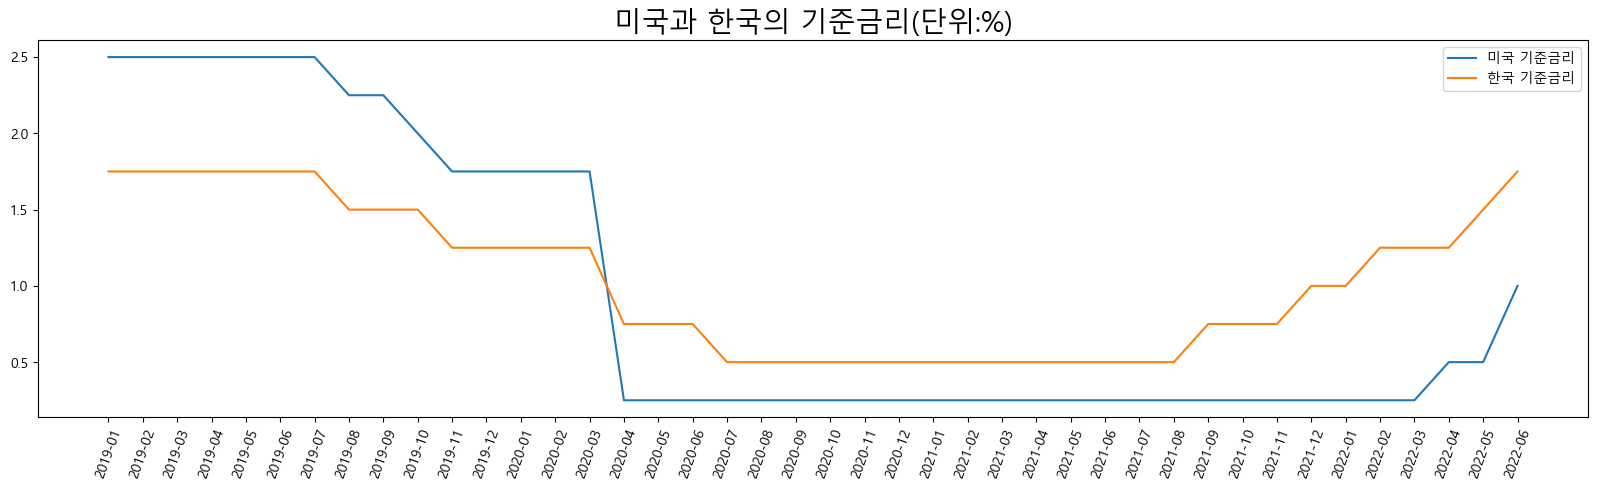

In [81]:
# 미국금리 & 한국금리

plt.figure(dpi=100,figsize=(20,5))
plt.xticks(rotation=70)
plt.title("미국과 한국의 기준금리(단위:%)",fontsize=20)

plt.plot(DF['기간'],DF['미국금리'])
plt.plot(DF['기간'],DF['한국금리'])

plt.legend(['미국 기준금리','한국 기준금리'])
plt.show()

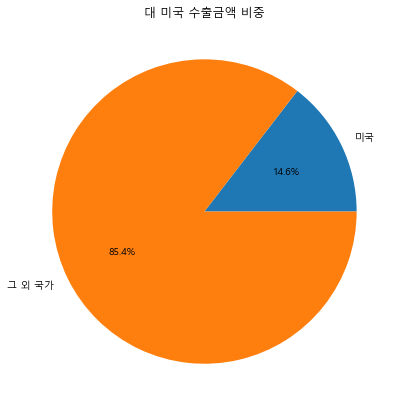

In [82]:
# 대 미국 수출 비중
ame=DF['대미국수출금액'].mean()
all_ame=DF['수출금액'].mean()-DF['대미국수출금액'].mean()
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie([ame,all_ame], labels=['미국', '그 외 국가'], autopct='%.1f%%')

plt.title('대 미국 수출금액 비중')
plt.show()

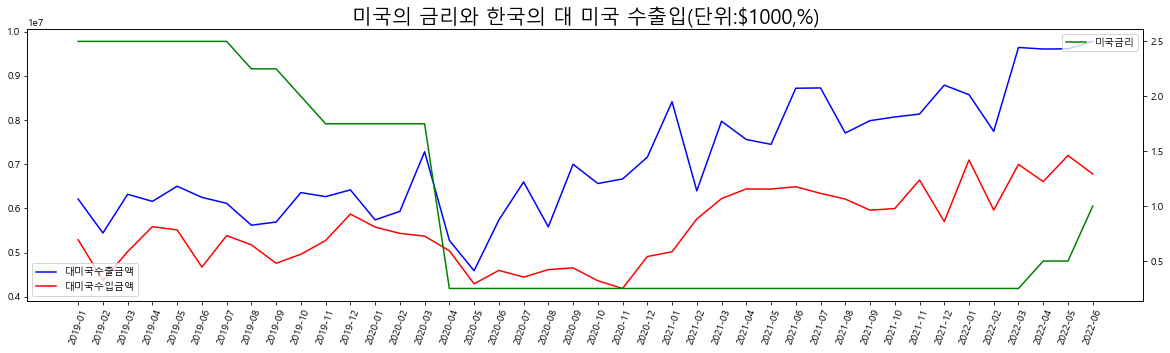

In [83]:
# 미국금리 & 대미국 수출입
plt.rcParams['figure.figsize'] = (20, 5)


fig, ax1 = plt.subplots()
plt.xticks(rotation=70)
plt.title("미국의 금리와 한국의 대 미국 수출입(단위:$1000,%)",fontsize=20)
ax1.plot(DF['기간'],DF['대미국수출금액'],color='blue')
ax1.plot(DF['기간'],DF['대미국수입금액'],color='red')
ax1.legend(['대미국수출금액','대미국수입금액'],loc='lower left')

ax2 = ax1.twinx()

ax2.plot(DF['기간'],DF['미국금리'],color='green')
ax2.legend(['미국금리'])


plt.show()

### 미국금리 & 대미국 수출수입
 - 미국의 기준금리가 낮은 기간 동안 대 미국 수출입 꾸준히 증가
 - 그 중에서 수출금액이 큰 폭으로 상승
 - 미국 금리의 하락 혹은 동결로 미국 가계의 소비가 증가하여 대 미국 수출이 큰 폭으로 증가후 최근 둔화

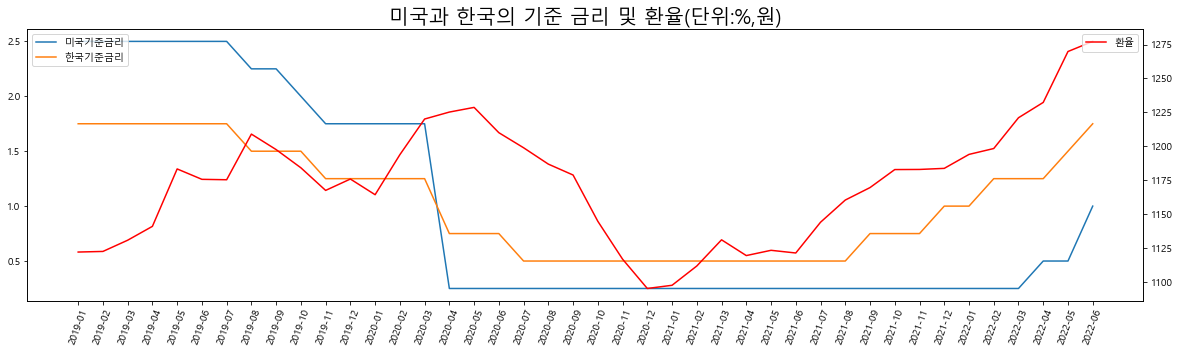

In [84]:
# 미국과 한국의 기준금리 & 환율
plt.rcParams['figure.figsize'] = (20, 5)


fig, ax1 = plt.subplots()
plt.xticks(rotation=70)
plt.title("미국과 한국의 기준 금리 및 환율(단위:%,원)",fontsize=20)
ax1.plot(DF['기간'],DF['미국금리'])
ax1.plot(DF['기간'],DF['한국금리'])

ax1.legend(['미국기준금리','한국기준금리'],loc='upper left')

ax2 = ax1.twinx()

ax2.plot(DF['기간'],DF['환율'],color='red')
ax2.legend(['환율'],loc='upper right')

plt.show()

### 미국과 한국의 기준금리 & 환율
 - 미국의 기준금리 인상으로 인해 환율이 가파르게 상승하고 있음
 - 미국의 기준금리 인상과 더불어 한국도 기준금리를 인상시키고 있지만 환율을 잡기에는 역부족

### 결론
 - 미국의 기준금리 인상은 최근 상승한 대 미국 수출을 크게 하락시킬 것으로 보임
 - 미국의 기준금리 인상으로 환율 역시 가파르게 상승하고 있음
 - 환율을 안정화 시키기 위해서 추가적인 정책의 검토가 필요함

###### 자료 출처
###### 미국금리 : 인베스팅닷컴(https://kr.investing.com/economic-calendar/interest-rate-decision-168)
###### 한국금리 : 한국은행(https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643)
###### 수출입총괄, 국가별 수출입 실적 : 수출입무역통계(https://unipass.customs.go.kr/ets/index.do)
###### 환율 : ECOS한국은행 경제통계시스템(https://ecos.bok.or.kr/#/)